In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a8722b8f9d4c9719c6b819532ba8e05


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | toliary
City not found. Skipping...
Processing Record 3 of Set 1 | sabang
Processing Record 4 of Set 1 | cascais
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | nacogdoches
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | djougou
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | lolua
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | taolanaro
City not f

Processing Record 40 of Set 4 | kearney
Processing Record 41 of Set 4 | dhidhdhoo
Processing Record 42 of Set 4 | ginir
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | makiyivka
Processing Record 45 of Set 4 | newport
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | greenville
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | purwa
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | broken hill
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | lamar
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | zambezi
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | praia
Processing Record 9 of Set 5 | mergui
City not found. Skipping...
Processing Record 10 of Set 5 | minot
Processing Record 11 of Set 5 | hohhot
Processing Record 12 of Set 5 | dingle
Processing Rec

City not found. Skipping...
Processing Record 30 of Set 8 | salvacion
Processing Record 31 of Set 8 | maldonado
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | labrea
Processing Record 34 of Set 8 | woodward
Processing Record 35 of Set 8 | garden city
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | port hawkesbury
Processing Record 38 of Set 8 | okakarara
Processing Record 39 of Set 8 | benguela
Processing Record 40 of Set 8 | pinyug
Processing Record 41 of Set 8 | roma
Processing Record 42 of Set 8 | nortelandia
Processing Record 43 of Set 8 | mountain home
Processing Record 44 of Set 8 | guymon
Processing Record 45 of Set 8 | pangody
Processing Record 46 of Set 8 | changchun
Processing Record 47 of Set 8 | bilma
Processing Record 48 of Set 8 | motala
Processing Record 49 of Set 8 | chulym
Processing Record 50 of Set 8 | taviano
Processing Record 1 of Set 9 | andenes
Processing Record 2 of Set 9 | coquimbo
Processing Record 3 of S

Processing Record 17 of Set 12 | kungurtug
Processing Record 18 of Set 12 | yambio
Processing Record 19 of Set 12 | mathbaria
Processing Record 20 of Set 12 | hasaki
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | xichang
Processing Record 23 of Set 12 | vestmannaeyjar
Processing Record 24 of Set 12 | kegayli
City not found. Skipping...
Processing Record 25 of Set 12 | belmonte
Processing Record 26 of Set 12 | salalah
Processing Record 27 of Set 12 | moerai
Processing Record 28 of Set 12 | eirunepe
Processing Record 29 of Set 12 | san rafael
Processing Record 30 of Set 12 | hong gai
Processing Record 31 of Set 12 | iracoubo
Processing Record 32 of Set 12 | codrington
Processing Record 33 of Set 12 | chenghai
Processing Record 34 of Set 12 | lander
Processing Record 35 of Set 12 | erzin
Processing Record 36 of Set 12 | kapoeta
Processing Record 37 of Set 12 | deulgaon raja
Processing Record 38 of Set 12 | limbang
Processing Record 39 of Set 12 | moree
Processing

In [11]:
len(city_data)

565

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-2.24,91,100,4.65,GL,2021-02-14 17:03:44
1,Sabang,5.8933,95.3214,83.39,71,31,10.92,ID,2021-02-14 17:03:44
2,Cascais,38.6979,-9.4215,68.00,52,0,6.91,PT,2021-02-14 17:03:44
3,Port Hardy,50.6996,-127.4199,35.60,93,90,28.77,CA,2021-02-14 17:00:11
4,New Norfolk,-42.7826,147.0587,59.00,67,100,1.01,AU,2021-02-14 17:03:44
5,Hobart,-42.8794,147.3294,59.00,88,90,14.97,AU,2021-02-14 17:00:32
6,Victoria,22.2855,114.1577,66.00,84,0,6.26,HK,2021-02-14 17:03:05
7,Barrow,71.2906,-156.7887,-16.60,76,90,6.44,US,2021-02-14 17:03:45
8,Dikson,73.5069,80.5464,-16.82,88,100,12.44,RU,2021-02-14 17:03:45
9,Atuona,-9.8000,-139.0333,78.51,74,5,15.05,PF,2021-02-14 17:03:45


In [13]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-02-14 17:03:44,72.7868,-56.1549,-2.24,91,100,4.65
1,Sabang,ID,2021-02-14 17:03:44,5.8933,95.3214,83.39,71,31,10.92
2,Cascais,PT,2021-02-14 17:03:44,38.6979,-9.4215,68.00,52,0,6.91
3,Port Hardy,CA,2021-02-14 17:00:11,50.6996,-127.4199,35.60,93,90,28.77
4,New Norfolk,AU,2021-02-14 17:03:44,-42.7826,147.0587,59.00,67,100,1.01


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

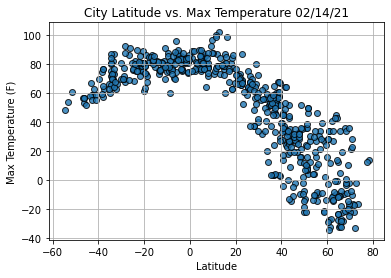

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

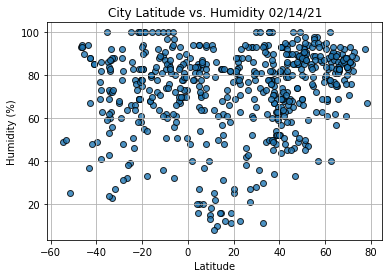

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

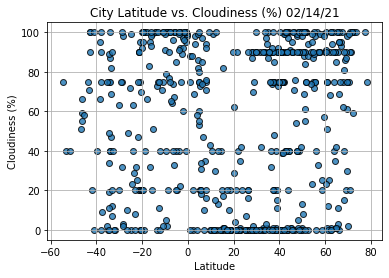

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

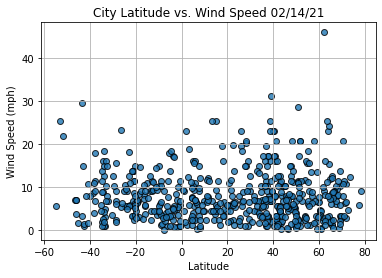

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Saskylakh
Country                        RU
Date          2021-02-14 17:03:46
Lat                       71.9167
Lng                       114.083
Max Temp                   -22.13
Humidity                       85
Cloudiness                    100
Wind Speed                  10.76
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-02-14 17:03:44,72.7868,-56.1549,-2.24,91,100,4.65
1,Sabang,ID,2021-02-14 17:03:44,5.8933,95.3214,83.39,71,31,10.92
2,Cascais,PT,2021-02-14 17:03:44,38.6979,-9.4215,68.00,52,0,6.91
3,Port Hardy,CA,2021-02-14 17:00:11,50.6996,-127.4199,35.60,93,90,28.77
6,Victoria,HK,2021-02-14 17:03:05,22.2855,114.1577,66.00,84,0,6.26


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

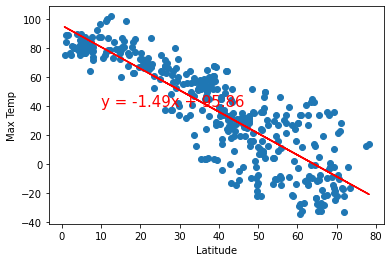

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

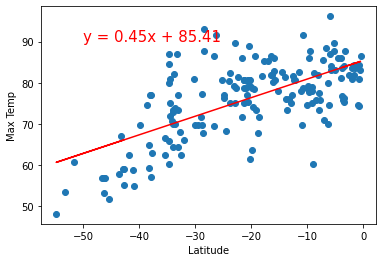

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

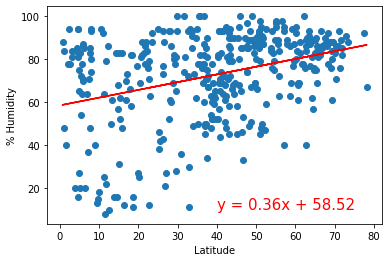

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

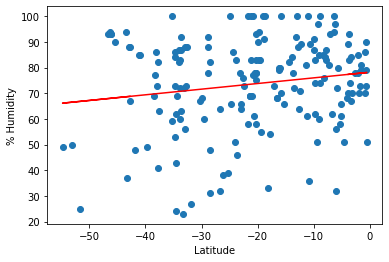

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

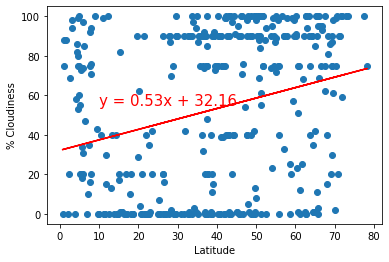

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

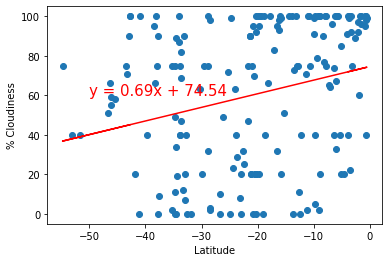

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

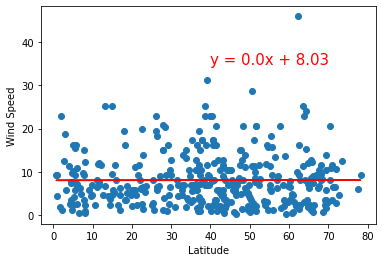

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

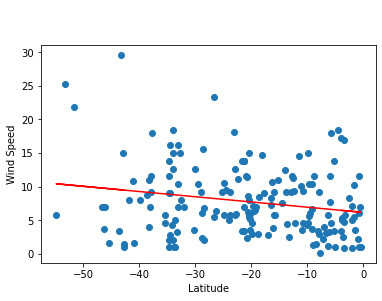

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [34]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [35]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Upernavik,GL,2021-02-14 17:03:44,72.7868,-56.1549,-2.24,91,100,4.65
1,1,Sabang,ID,2021-02-14 17:03:44,5.8933,95.3214,83.39,71,31,10.92
2,2,Cascais,PT,2021-02-14 17:03:44,38.6979,-9.4215,68.00,52,0,6.91
3,3,Port Hardy,CA,2021-02-14 17:00:11,50.6996,-127.4199,35.60,93,90,28.77
4,4,New Norfolk,AU,2021-02-14 17:03:44,-42.7826,147.0587,59.00,67,100,1.01


In [36]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [40]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [44]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(27.0, 31.0), zoom_level=1.1)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=100, point_radius=4.2)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Heatmap of windspeed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [50]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Sabang,ID,2021-02-14 17:03:44,5.8933,95.3214,83.39,71,31,10.92
9,9,Atuona,PF,2021-02-14 17:03:45,-9.8000,-139.0333,78.51,74,5,15.05
17,17,Chuy,UY,2021-02-14 17:03:47,-33.6971,-53.4616,82.09,63,69,0.92
19,19,Bredasdorp,ZA,2021-02-14 17:03:47,-34.5322,20.0403,75.20,43,34,16.11
22,22,Porto Nacional,BR,2021-02-14 17:01:44,-10.7081,-48.4172,78.80,89,75,4.61
26,26,Rikitea,PF,2021-02-14 16:59:47,-23.1203,-134.9692,79.18,78,8,18.19
32,32,Georgetown,MY,2021-02-14 17:03:49,5.4112,100.3354,84.20,54,20,5.75
33,33,Saint-Philippe,RE,2021-02-14 17:03:49,-21.3585,55.7679,80.60,69,90,13.80
36,36,Vaini,TO,2021-02-14 17:03:49,-21.2000,-175.2000,75.20,100,20,3.44
41,41,Butaritari,KI,2021-02-14 17:03:50,3.0707,172.7902,80.20,81,94,18.84


In [51]:
preferred_cities_df.count()

City_ID       177
City          177
Country       174
Date          177
Lat           177
Lng           177
Max Temp      177
Humidity      177
Cloudiness    177
Wind Speed    177
dtype: int64

In [57]:
preferred_cities_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Sabang,ID,2021-02-14 17:03:44,5.8933,95.3214,83.39,71,31,10.92
9,9,Atuona,PF,2021-02-14 17:03:45,-9.8000,-139.0333,78.51,74,5,15.05
17,17,Chuy,UY,2021-02-14 17:03:47,-33.6971,-53.4616,82.09,63,69,0.92
19,19,Bredasdorp,ZA,2021-02-14 17:03:47,-34.5322,20.0403,75.20,43,34,16.11
22,22,Porto Nacional,BR,2021-02-14 17:01:44,-10.7081,-48.4172,78.80,89,75,4.61
